In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1337)

n_plots = 200

terrain = pd.DataFrame({
    "plot_id": range(1, n_plots+1),
    "elevation_m": np.random.normal(0, 3000, n_plots),
    "terrain_slope": np.clip(np.random.normal(15, 10, n_plots), 0, 60),
    "soil_granularity": np.random.randint(1, 11, n_plots),
    "subsurface_ice": np.clip(np.random.normal(25, 15, n_plots), 0, 100),
    "solar_flux": np.clip(np.random.normal(5, 2, n_plots), 2, 10),
})

# Suitability for Sakura beans (more stable terrain and sunlight)
def compute_plant_suitability(row):
    score = (
        -0.001 * abs(row["elevation_m"]) +
        -0.5 * row["terrain_slope"] +
        -1.2 * (row["soil_granularity"] - 5)**2 +
        0.6 * row["subsurface_ice"] +
        5 * row["solar_flux"]
    )
    return max(0, score / 10)

terrain["plant_suitability_score"] = terrain.apply(compute_plant_suitability, axis=1)

# Aquaponics score (prefers ice, flat terrain, solar power)
def compute_aquaponics_score(row):
    score = (
        -0.002 * abs(row["elevation_m"]) +
        -0.7 * row["terrain_slope"] +
        1.5 * row["subsurface_ice"] +
        4.5 * row["solar_flux"]
    )
    return max(0, score / 10)

terrain["aquaponics_score"] = terrain.apply(compute_aquaponics_score, axis=1)


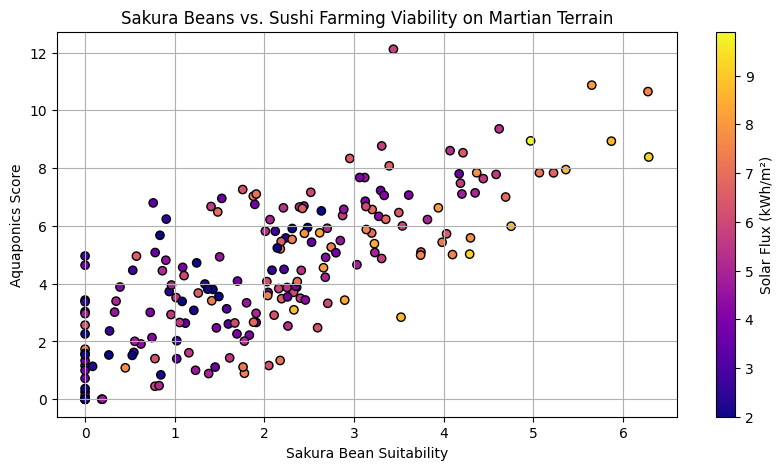

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(terrain["plant_suitability_score"], terrain["aquaponics_score"], c=terrain["solar_flux"], cmap="plasma", edgecolor='k')
plt.xlabel("Sakura Bean Suitability")
plt.ylabel("Aquaponics Score")
plt.title("Sakura Beans vs. Sushi Farming Viability on Martian Terrain")
plt.colorbar(label="Solar Flux (kWh/m²)")
plt.grid(True)
plt.show()


In [4]:
terrain.to_csv("mars_sakura_sushi_dataset.csv", index=False)